In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
probePath = "./simpleColumn/postProcessing/probes/0.000/h"
widths = [14]*6
names = ['Time'] + [f"Probe {i}" for i in range(5)]
OpenFoamData = pd.read_fwf(probePath, widths=widths,skiprows=7,names=names)

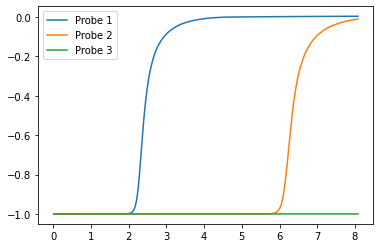

In [3]:
fig,ax = plt.subplots()
for probe in names[2:-1]:
    ax.plot(OpenFoamData['Time']/3600,OpenFoamData[probe],label=probe)
plt.legend()
plt.show()

In [4]:
probePath = "./simpleColumn_Hydrus1D/Orgogozo2014/ORGOGOZO/Obs_Node.out"
colspecs = [(9,18),(21,30),(54,63),(87,96)]
names = ['Time'] + [f"h Node({i})" for i in (26,51,76)]
HydrusData = pd.read_fwf(probePath, colspecs=colspecs, skiprows=11,names=names)

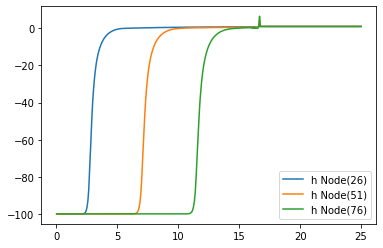

In [5]:
fig,ax = plt.subplots()
for probe in names[1:]:
    ax.plot(HydrusData['Time'],HydrusData[probe],label=probe)
plt.legend()
plt.show()

In [6]:
probePath = "./simpleColumn_PFLOTRAN/100_z-obs-0.pft"
widths = [14]*4
names = ['Time'] + [f"Liquid Pressure Pa {i} cm" for i in (25,50,75)]
PFLOTRANData = pd.read_fwf(probePath, widths=widths, skiprows=1,names=names)
#PFLOTRANData["h (m)"] = (PFLOTRANData["Liquid Pressure Pa"]-101325)/9806.38

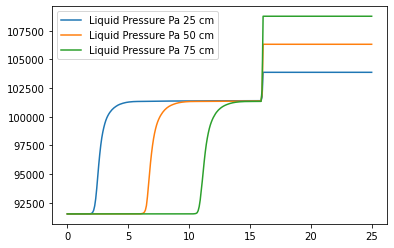

In [7]:
fig,ax = plt.subplots()
for probe in names[1:]:
    ax.plot(PFLOTRANData['Time'],PFLOTRANData[probe],label=probe)
plt.legend()
plt.show()

In [8]:
probePath = "./simpleColumn_RichardsFoam/postProcessing/probes/0/H"
widths = [14]*6
names = ['Time'] + [f"Probe {i}" for i in range(5)]
RichardsFoamData = pd.read_fwf(probePath, widths=widths,skiprows=7,names=names)

RichardsFoamData["Probe 1"] = RichardsFoamData["Probe 1"] + 0.25 - 1
RichardsFoamData["Probe 2"] = RichardsFoamData["Probe 2"] + 0.50 - 1
RichardsFoamData["Probe 3"] = RichardsFoamData["Probe 3"] + 0.75 - 1

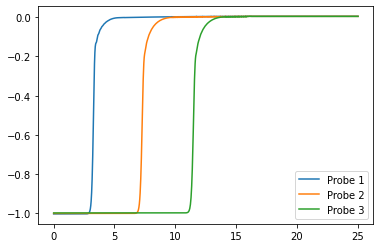

In [9]:
fig,ax = plt.subplots()
for probe in names[2:-1]:
    ax.plot(RichardsFoamData['Time']/3600,RichardsFoamData[probe],label=probe)
plt.legend()
plt.show()

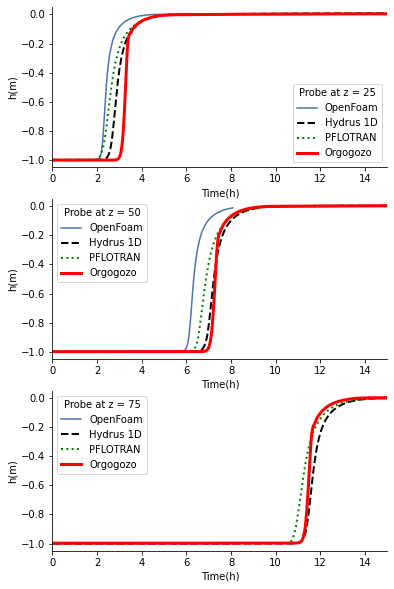

In [10]:
#with plt.xkcd():
with plt.style.context('seaborn-deep'):
    fig,axs = plt.subplots(3,figsize=(6,10))
    for ax,probe in zip(axs,OpenFoamData.columns[2:-1]):
        ax.plot(OpenFoamData['Time']/3600,OpenFoamData[probe],label="OpenFoam")
    
    for ax,probe in zip(axs,HydrusData.columns[1:]):
        ax.plot(HydrusData['Time'],HydrusData[probe]/100,ls='dashed',c='k',lw=2,label="Hydrus 1D")

    for ax,probe in zip(axs,PFLOTRANData.columns[1:]):
        ax.plot(PFLOTRANData['Time'],(PFLOTRANData[probe]-101325)/9806.38,ls='dotted',c='g',lw=2, label="PFLOTRAN")

    for ax,probe in zip(axs,RichardsFoamData.columns[2:-1]):
        ax.plot(RichardsFoamData['Time']/3600,RichardsFoamData[probe],c='r',lw=3, label="Orgogozo")
    
    for ax in axs:
        ax.set(ylabel="h(m)",xlabel="Time(h)",xlim=[0,15],ylim=[-1.05,.05])
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
    
    for ax,depth in zip(axs,(25,50,75)):
        ax.legend(title=f"Probe at z = {depth}")
    plt.show()